# Image Processing in Python using Scikit-image

Jump into digital image structures and learn to process them! Extract data, transform and analyze images using NumPy and Scikit-image. With just a few lines of code, you will convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

In [4]:
coffee_image = data.coffee()
coins_image = data.coins()

In [8]:
np.shape(coffee_image)

(400, 600, 3)

In [9]:
np.shape(coins_image)

(303, 384)

coins_image has a shape of (303, 384), grayscale. And coffee_image (400, 600, 3), RGB-3.

In [10]:
def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

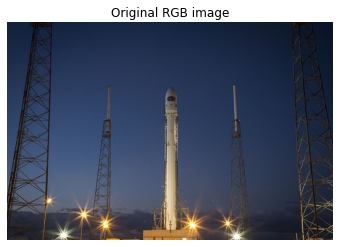

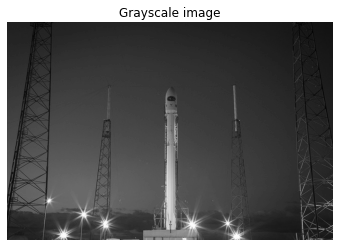

In [13]:
# Import the modules from skimage
from skimage import data, color
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

City of Seville upside-down
Image loaded as flipped_seville.
Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the show_image() function.

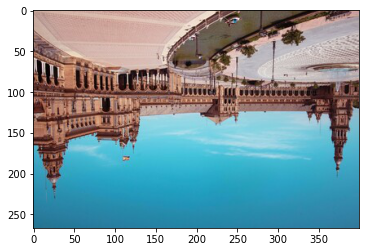

In [20]:
flipped_seville = plt.imread('flipped_seville.jpg')
plt.imshow(flipped_seville)

In [22]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

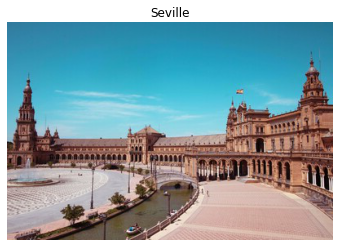

In [23]:
# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

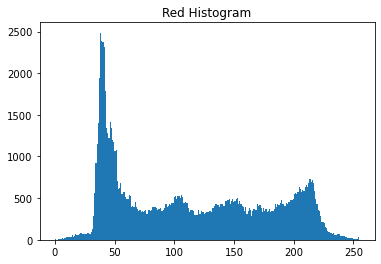

In [24]:
# Obtain the red channel
red_channel = flipped_seville[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

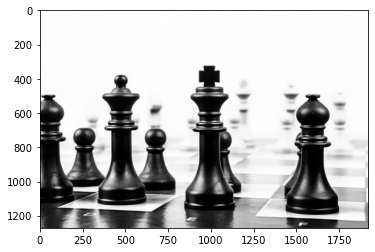

In [26]:
chess_pieces_image = plt.imread('bw.jpg')
plt.imshow(chess_pieces_image)

**Apply global thresholding**

In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.

You'll see the resulting binarized image when using the show_image() function, previously explained.

Chess pieces
Image loaded as chess_pieces_image.

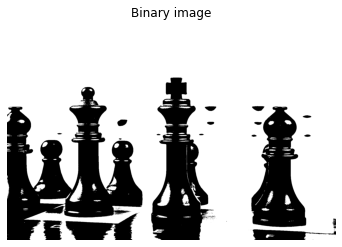

In [28]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

Awesome! We just converted the image to binary and we can separate the foreground from the background

Scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

Forest fruits
Image loaded as fruits_image.
You will apply this function to this image, matplotlib.pyplot has been loaded as plt. Remember that you can use try_all_threshold() to try multiple global algorithms.

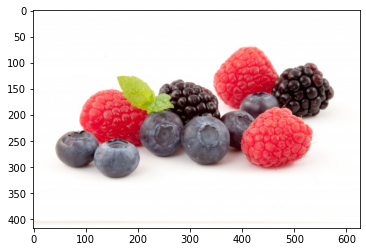

In [40]:
fruits_image = plt.imread("fruits-2.jpg")
plt.imshow(fruits_image)

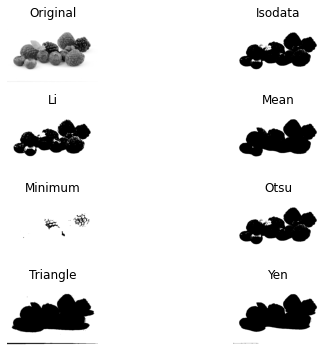

In [41]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

Nice! As you see, this image works good with some global thresholding methods (like the "Yen" and "Mean") and not so well in others, (like the "Minimum").

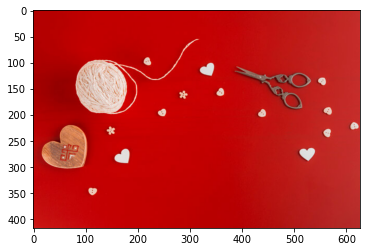

In [42]:
tools_image = plt.imread('shapes52.jpg')
plt.imshow(tools_image)

**Apply thresholding**

In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

Several tools for handcraft art
Image loaded as tools_image.
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

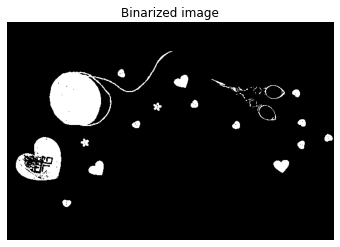

In [44]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

Awesome! By using a global thresholding method, you obtained the precise binarized image. If you would have used local instead nothing would have been segmented

In [45]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 6), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap = plt.cm.gray)
    ax2.set_title('filtered')
    ax2.axis('off')
    

**Edge detection**

In this exercise, you'll detect edges in an image by applying the Sobel filter.

Soap pills of heart and rectangle shapes in blue background
Image preloaded as soaps_image.
Theshow_image() function has been already loaded for you.

Let's see if it spots all the figures in the image.

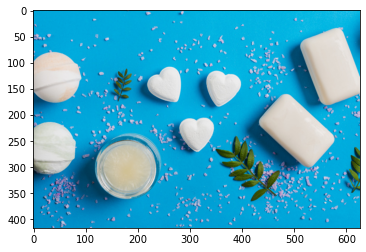

In [46]:
soaps_image = plt.imread('soap_image.jpg')
plt.imshow(soaps_image)

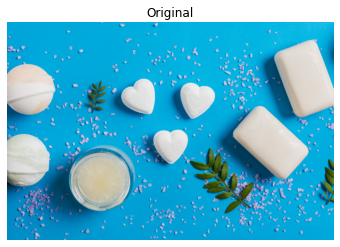

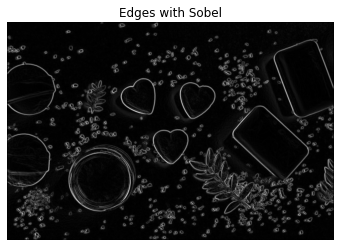

In [47]:
# Import the color module
from skimage import color

# Import the filters module and sobel function
from skimage.filters import sobel

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

**Blurring to reduce noise**

In this exercise you will reduce the sharpness of an image of a building taken during a London trip, through filtering.



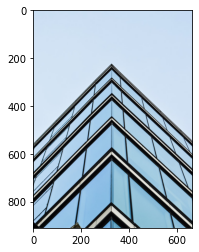

In [48]:
building_image= plt.imread('corners_building_top.jpg')
plt.imshow(building_image)

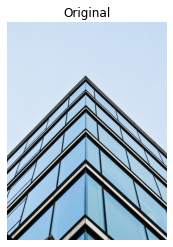

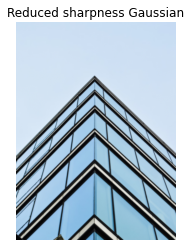

In [49]:
# Import Gaussian filter 
from skimage.filters import gaussian

# Apply filter
gaussian_image = gaussian(building_image, multichannel = True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

Awesome! You have removed the excessive sharpness in the image.

**Medical images**

You are trying to improve the tools of a hospital by pre-processing the X-ray images so that doctors have a higher chance of spotting relevant details. You'll test our code on a chest X-ray image from the National Institutes of Health Chest X-Ray Dataset

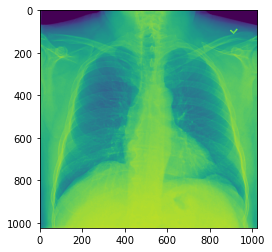

In [51]:
chest_xray_image = plt.imread('chest_xray_image.png')
plt.imshow(chest_xray_image)

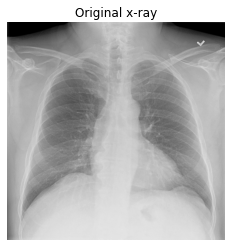

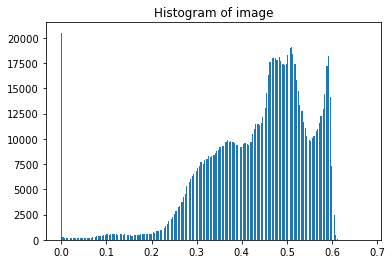

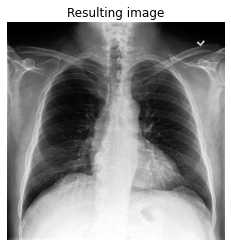

In [52]:
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

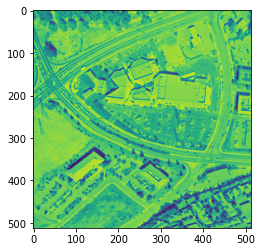

In [54]:
image_aerial = plt.imread('image_aerial.tiff')
plt.imshow(image_aerial)

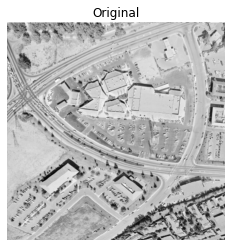

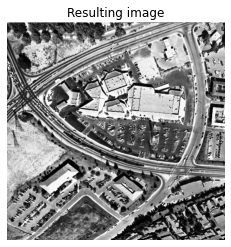

In [55]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

**Let's add some impact and contrast**

Have you ever wanted to enhance the contrast of your photos so that they appear more dramatic?

In this exercise, you'll increase the contrast of a cup of coffee. Something you could share with your friends on social media. Don't forget to use #ImageProcessingDatacamp as hashtag!

Even though this is not our Sunday morning coffee cup, you can still apply the same methods to any of our photos.



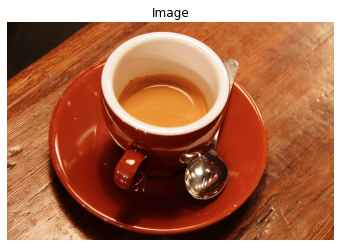

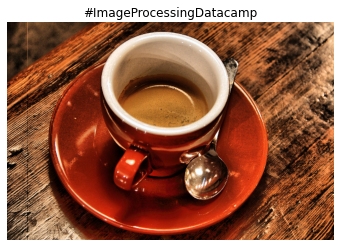

In [57]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

Amazing! You have increased the contrast of the image using an algorithm for local contrast enhancement, that uses histograms computed over different tile regions of the image. Local details can therefore be enhanced even in regions that are darker or lighter than the rest of the image.

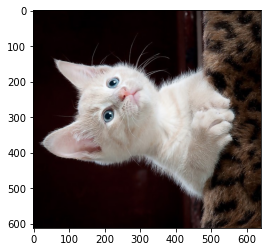

In [58]:
image_cat = plt.imread('image_cat.jpg')
plt.imshow(image_cat)

**Aliasing, rotating and rescaling**

Let's look at the impact of aliasing on images.

Remember that aliasing is an effect that causes different signals, in this case pixels, to become indistinguishable or distorted.

You'll make this cat image upright by rotating it 90 degrees and then rescaling it two times. Once with the anti aliasing filter applied before rescaling and a second time without it, so you can compare them

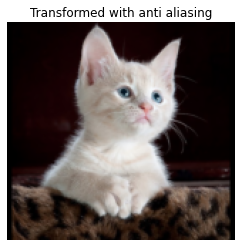

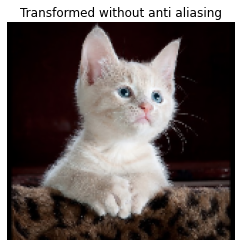

In [59]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

**Enlarging images**

Have you ever tried resizing an image to make it larger? This usually results in loss of quality, with the enlarged image looking blurry.

The good news is that the algorithm used by scikit-image works very well for enlarging images up to a certain point.

In this exercise you'll enlarge an image three times!!

You'll do this by rescaling the image of a rocket, that will be loaded from the data module.



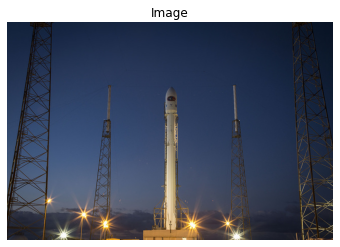

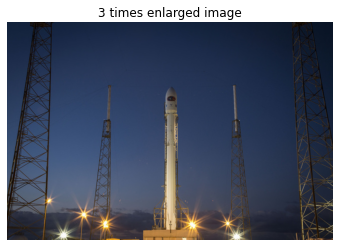

In [60]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 3 times bigger
enlarged_rocket_image = rescale(rocket_image, 3, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
show_image(enlarged_rocket_image, "3 times enlarged image")

Wow!
The image went from being 600 pixels wide to over 2500 and it still does not look poorly pixelated!

**Proportionally resizing**

We want to downscale the images of a veterinary blog website so all of them have the same compressed size.

It's important that you do this proportionally, meaning that these are not distorted.



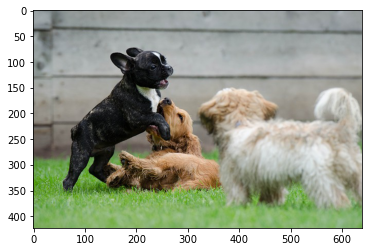

In [61]:
dogs_banner = plt.imread('dogs_banner.jpg')
plt.imshow(dogs_banner)

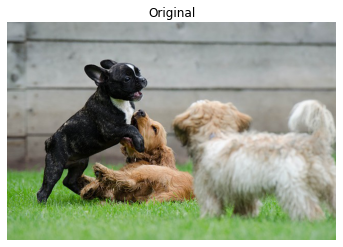

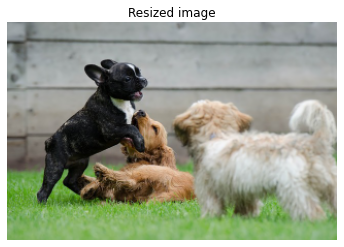

In [63]:
# Import the module and function
from skimage.transform import resize

# Set proportional height so its half its size
height = int(dogs_banner.shape[0] / 2)
width = int(dogs_banner.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(dogs_banner, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
show_image(dogs_banner, 'Original')
show_image(image_resized, 'Resized image')

Excellent! The image is now compressed and ready. We can use this code for future images that are uploaded to the website.

**Handwritten letters**

A very interesting use of computer vision in real-life solutions is performing Optical Character Recognition (OCR) to distinguish printed or handwritten text characters inside digital images of physical documents.

Let's try to improve the definition of this handwritten letter so that it's easier to classify.


As we can see it's the letter R, already binary, with some noise in it. It's already loaded as upper_r_image.

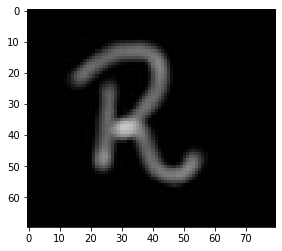

In [70]:
upper_r_image = plt.imread('r5.jpg')
plt.imshow(upper_r_image)

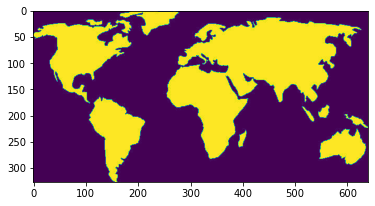

In [72]:
world_image = plt.imread('world_image_binary.jpg')
plt.imshow(world_image)

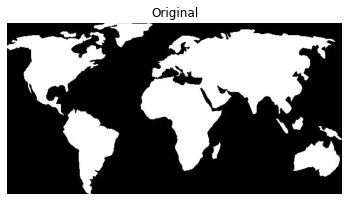

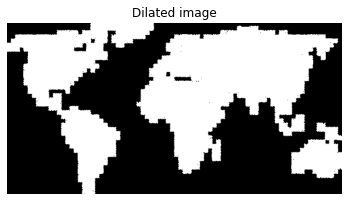

In [73]:
# Import the module
from skimage import morphology

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')

After removing the noise of the segmented image it looks more uniform than before.

## Image restoration

Let's restore a damaged image
In this exercise, we'll restore an image that has missing parts in it, using the inpaint_biharmonic() function.

Small cute puppy
Loaded as defect_image.
We'll work on an image from the data module, obtained by data.astronaut(). Some of the pixels have been replaced with 0s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 0s turns them totally black. The defective image is saved as an array called defect_image.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas. This mask is preloaded as mask.

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.

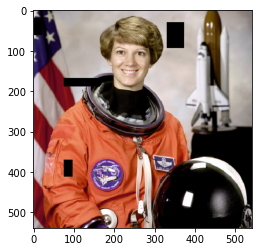

In [80]:
defect_image = plt.imread('defect_image.png')
plt.imshow(defect_image)

In [81]:
def get_mask(image):
    mask = np.zeros(image.shape[:-1])
    mask[101:106, 0:240] = 1
    
    mask[152:154, 0:60] = 1
    mask[153:155, 60:100] = 1
    mask[154:156, 100:120] = 1
    mask[155:156, 120:140] = 1
    
    mask[212:217, 0:150] = 1
    mask[217:222, 150:256] = 1

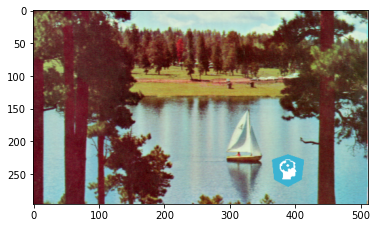

In [95]:
image_with_logo = plt.imread('4.2.06_w_logo_2_2.png')
plt.imshow(image_with_logo)

Removing logos
we use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

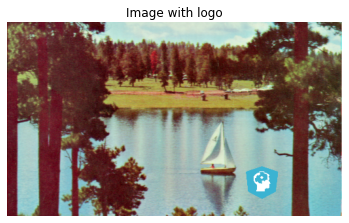

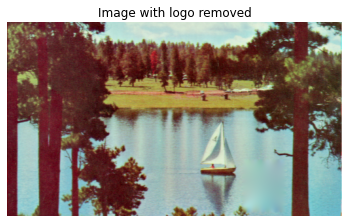

In [97]:
# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                  mask,
                                  multichannel=True)

# Show the original and logo removed images
show_image(image_with_logo, 'Image with logo')
show_image(image_logo_removed, 'Image with logo removed')

Excellent! Now you know how you can remove objects or logos from images. Be wise in how you use your new acquired knowledge, magician.

**Noise**

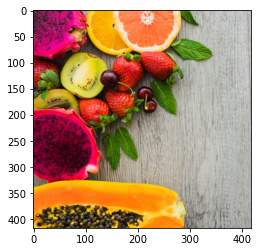

In [105]:
fruit_image = plt.imread('fruits_square.jpg')
plt.imshow(fruit_image)

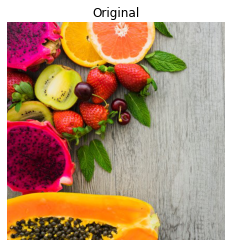

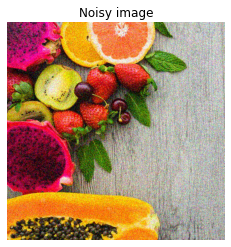

In [106]:
# Import the module and function
from skimage.util import random_noise

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show original and resulting image
show_image(fruit_image, 'Original')
show_image(noisy_image, 'Noisy image')

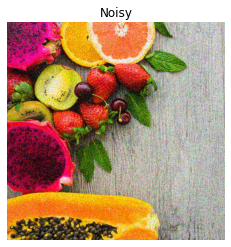

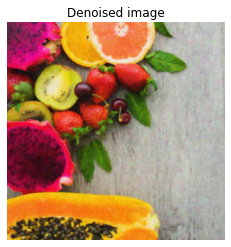

In [109]:
# Import the module and function
from skimage.restoration import denoise_tv_chambolle

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, 
                                      multichannel=True)

# Show the noisy and denoised images
show_image(noisy_image, 'Noisy')
show_image(denoised_image, 'Denoised image')

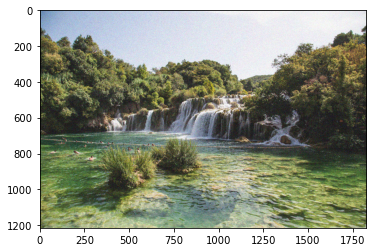

In [110]:
landscape_image = plt.imread('noise-noisy-nature.jpg')
plt.imshow(landscape_image)

**Reducing noise while preserving edges**

In this exercise, you will reduce the noise in this landscape picture.

Landscape of a river
Preloaded as landscape_image.
Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.

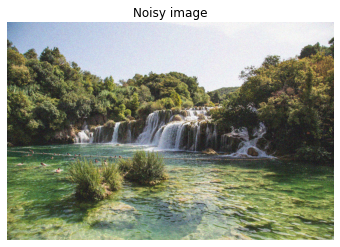

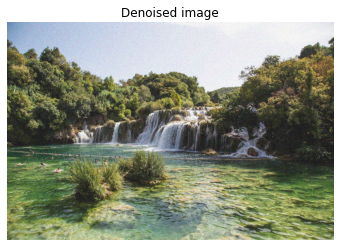

In [111]:
# Import bilateral denoising function
from skimage.restoration import denoise_bilateral

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, 
                                   multichannel=True)

# Show original and resulting images
show_image(landscape_image, 'Noisy image')
show_image(denoised_image, 'Denoised image')

Great! We have denoised the image without losing sharpness.
In this case denoise_bilateral() worked well with the default optional parameters.

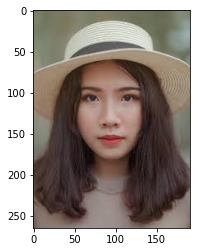

In [112]:
face_image = plt.imread('chinese.jpg')
plt.imshow(face_image)

**Number of pixels**
Let's calculate the total number of pixels in this image.

Young woman
Image preloaded as face_image
The total amount of pixel is its resolution. Given by `Height` * `Width`

In [113]:
np.shape(face_image)

(265, 191, 3)

The image is 50,615 pixels in total

**Superpixel segmentation**

In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from  pixels from `265 * 191 = 50,615` down to 400 regions.



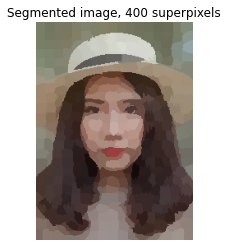

In [115]:
# Import the slic function from segmentation module
from skimage.segmentation import slic

# Import the label2rgb function from color module
from skimage.color import label2rgb

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments= 400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
show_image(segmented_image, "Segmented image, 400 superpixels")

**Contouring shapes**

In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

In [126]:
def show_image_contours(image, contours):
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

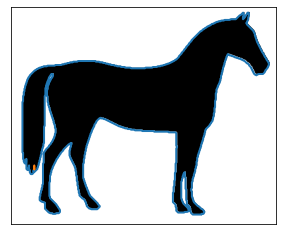

In [127]:
# Import the modules
from skimage import data, measure

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contours(horse_image, contours)

Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dice loaded as image_dice and determine what number was rolled for each dice.

Purple dice
In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

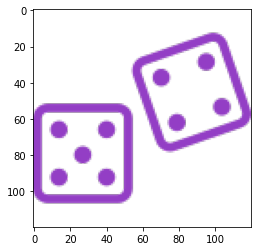

In [129]:
image_dice = plt.imread('dices.png')
plt.imshow(image_dice)

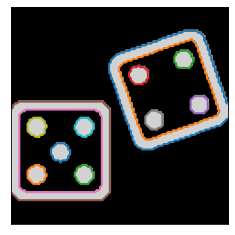

In [132]:
from skimage import filters, measure, color

# Make the image grayscale
image_dice = color.rgb2gray(image_dice)

# Obtain the optimal thresh value
thresh = filters.threshold_otsu(image_dice)

# Apply thresholding
binary = image_dice > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contours(image_dice, contours)

We've made the image a 2D array by slicing, applied thresholding and succesfully found the contour. Now we can apply it to any image you work on in the future.

Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

3 images showing the steps to find contours

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as contours.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

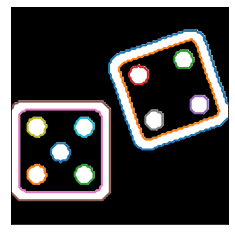

Dice's dots number: 9. 


In [133]:
# Create list with the shape of each contour 
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contours(binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

##  Advanced Operations, Detecting Faces and Features

**Edges**

In this exercise you will identify the shapes in a grapefruit image by detecting the edges, using the Canny algorithm.

Grapefruits
Image preloaded as grapefruit.

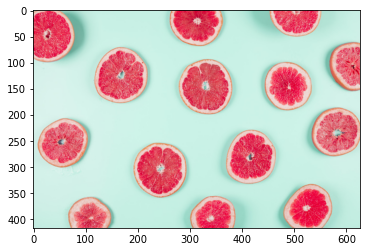

In [135]:
grapefruit = plt.imread('toronjas.jpg')
plt.imshow(grapefruit)

In [137]:
def show_image(image, title = 'Image', cmap_type = 'gray'):
    plt.imshow(image, cmap = cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

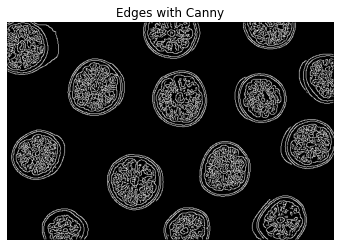

In [138]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

You can see the shapes and details of the grapefruits of the original image being highlighted.

**Less edgy**

Let's now try to spot just the outer shape of the grapefruits, the circles. You can do this by applying a more intense Gaussian filter to first make the image smoother. This can be achieved by specifying a bigger sigma in the canny function.

In this exercise, you'll experiment with sigma values of the canny() function.

Grapefruits
Image preloaded as grapefruit.
The show_image has already been preloaded.

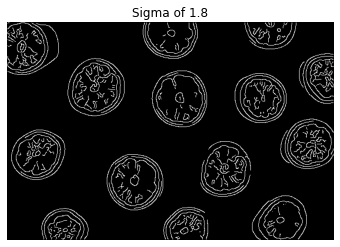

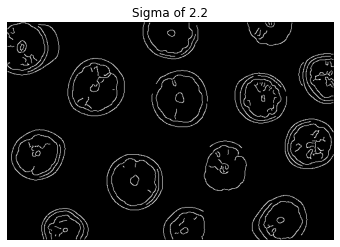

In [140]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

**The bigger the sigma value, the less edges are detected because of the gaussian filter pre applied.**

In [141]:
def show_image_with_corners(image, coords, title = "Corners detected"):
    plt.imshow(image, interpolation = 'nearest', cmap = 'gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize = 15)
    plt.axis('off')
    plt.show()

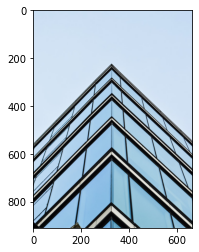

In [142]:
building_image = plt.imread("corners_building_top.jpg")
plt.imshow(building_image)    

**Perspective**

Now we will detect the corners of a building using the Harris corner detector.

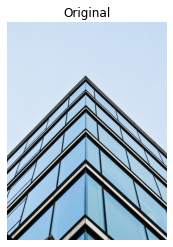

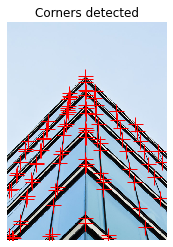

In [143]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

**Less corners**

In this exercise, you will test what happens when you set the minimum distance between corner peaks to be a higher number. Remember you do this with the min_distance attribute parameter of the corner_peaks() function.

With a min_distance set to 2, we detect a total 98 corners in the image.
With a min_distance set to 40, we detect a total 36 corners in the image.


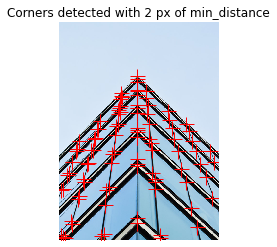

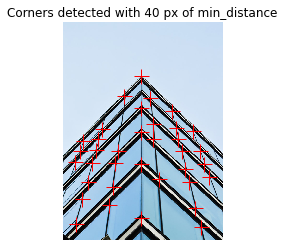

In [144]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

**With a 40-pixel distance between the corners there are a lot less corners than with 2 pixels.**

In [166]:
def show_detected_face(result, detected, title="Face image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch( 
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,color='r',linewidth=2)
        )
    plt.show()


**Is someone there?**

In this exercise, you will check whether or not there is a person present in an image taken at night.

Landscape of starry night with a young man in the left bottom corner
Image preloaded as night_image.
The Cascade of classifiers class from feature module has been already imported. The same is true for the show_detected_face() function, that is used to display the face marked in the image and crop so it can be shown separately.

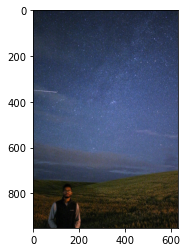

In [167]:
night_image = plt.imread('face_det3.jpg')
plt.imshow(night_image)

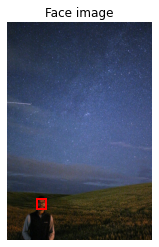

In [168]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

**The detector found the face even when it's very small and pixelated. Note though that you would ideally want a well-illuminated image for detecting faces.**

**Multiple faces**

In this exercise, you will detect multiple faces in an image and show them individually. Think of this as a way to create a dataset of your own friends' faces!

A group of 7 friends
Image preloaded as friends_image.
The Cascade of classifiers class from feature module has already been imported, as well as the show_detected_face() function which is used to display the face marked in the image and crop it so it can be shown separately.

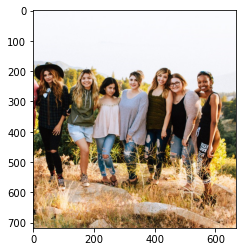

In [169]:
friends_image = plt.imread("face_det_friends22.jpg")
plt.imshow(friends_image)

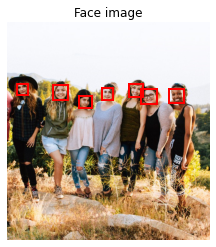

In [170]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

**Segmentation and face detection**

Previously, you learned how to make processes more computationally efficient with unsupervised superpixel segmentation. In this exercise, you'll do just that!

Using the slic() function for segmentation, pre-process the image before passing it to the face detector.

Young woman selfie
Image preloaded as profile_image.

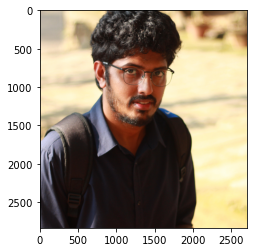

In [172]:
profile_image = plt.imread("face_det.jpg")
plt.imshow(profile_image)

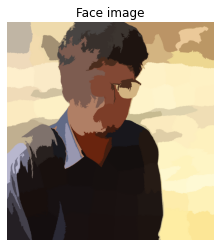

In [173]:
# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)

**We applied segementation to the image before passing it to the face detector and it's finding the face even when the image is relatively large.
This time we used 1000 by 1000 pixels as the maximum size of the searching window because the face in this case was indeed rather larger in comparison to the image.**